In [4]:
import numpy as np

from mtdlearn.mtd import MTD, RandomWalk
from mtdlearn.preprocessing import PathEncoder, SequenceCutter

ModuleNotFoundError: No module named 'mtdlearn'

In [3]:
import pandas as pd

data = pd.read_csv("inflation_data.csv")
data.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'inflation_data.csv'

In [1]:
import requests
import json
import pandas as pd

def get_report(parameters):

    # Call the API to get the report. Write it to a JSON file.

    headers = {'Content-type': 'application/json'}

    response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data = parameters, headers = headers)

    return response.json()


parameters = json.dumps({"registrationkey":"392bd0c8d57444c3a8925aa170b81d3b", "seriesid":['CUUR0000SA0'], "startyear":"1821", "endyear":"1999", "calculations":"true"})

print(get_report(parameters))

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 405, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.', 'No Data Available for Series CUUR0000SA0 Year: 1821', 'No Data Available for Series CUUR0000SA0 Year: 1822', 'No Data Available for Series CUUR0000SA0 Year: 1823', 'No Data Available for Series CUUR0000SA0 Year: 1824', 'No Data Available for Series CUUR0000SA0 Year: 1825', 'No Data Available for Series CUUR0000SA0 Year: 1826', 'No Data Available for Series CUUR0000SA0 Year: 1827', 'No Data Available for Series CUUR0000SA0 Year: 1828', 'No Data Available for Series CUUR0000SA0 Year: 1829', 'No Data Available for Series CUUR0000SA0 Year: 1830', 'No Data Available for Series CUUR0000SA0 Year: 1831', 'No Data Available for Series CUUR0000SA0 Year: 1832', 'No Data Available for Series CUUR0000SA0 Year: 1833', 'No Data Available for Series CUUR0000SA0 Year: 1834', 'No Data Available for Series CUUR0000SA0 Year: 1835', 'No Data Available for Series CUUR0000

In [2]:
df = pd.read_csv('euro_usd.csv')

df['Change'] = df.Closing_rate.diff()

df['Change_enc'] = np.nan

df.loc[df.Change < 0.0, 'Change_enc'] = '1_DROP'
df.loc[df.Change < -0.005, 'Change_enc'] = '0_BIG_DROP'
df.loc[df.Change >= 0, 'Change_enc'] = '2_RISE'
df.loc[df.Change >= 0.005, 'Change_enc'] = '3_BIG_RISE'

df.dropna(inplace=True)

## Fit models

In [3]:
aics = []
bics = []

In [4]:
order = 0

pe = PathEncoder(0, return_vector=True, input_vector=True)
y = pe.fit_transform(df.Change_enc.values.astype(str))

model = RandomWalk(4)
model.fit(y)

aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

log-likelihood value: -7580.052776968353
15166.1 15186.0


In [5]:
order = 1

sc = SequenceCutter(order)
x, y = sc.transform(df.Change_enc.values)

pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

log-likelihood value: -7559.338906203925
15142.7 15222.1


In [6]:
order = 2

sc = SequenceCutter(order)
x, y = sc.transform(df.Change_enc.values)

pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

log-likelihood value: -7547.228509309229
15136.5 15275.4


In [7]:
order = 3

sc = SequenceCutter(order)
x, y = sc.transform(df.Change_enc.values)

pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

log-likelihood value: -7535.262984448922
15130.5 15329.0


In [8]:
order = 4

sc = SequenceCutter(order)
x, y = sc.transform(df.Change_enc.values)

pe = PathEncoder(order)
pe.fit(x, y)

x_tr, y_tr = pe.transform(x, y)

model = MTD(order=order, n_jobs=-1, number_of_initiations=100)
model.fit(x_tr, y_tr)
aics.append(model.aic)
bics.append(model.bic)

print(model.aic.round(1), model.bic.round(1))

log-likelihood value: -7529.538580393596
15137.1 15395.1


## Choose model

In [9]:
xs = [0, 1, 2, 3, 4]

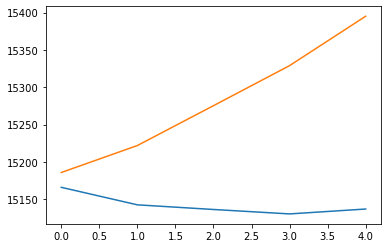

In [10]:
sns.lineplot(x=xs, y=aics)
sns.lineplot(x=xs, y=bics);